<center style="font-size: 30px;">Lab1</center>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [4]:
data = {
    'iron_water': [0.024, 0.038, 0.04, 0.045, 0.047, 0.0578, 0.0629, 0.0629, 0.063, 0.064,
                   0.0678, 0.0691, 0.071, 0.0742, 0.0752, 0.077, 0.0779, 0.0781, 0.0787, 0.0789,
                   0.0791, 0.0862, 0.0867, 0.0877, 0.089, 0.0897, 0.096, 0.098, 0.099],
    'iron_hair': [11.7, 12.7, 15.5, 16.8, 16.7, 17.5, 18.5, 18.7, 18.8, 19.5,
                  20.8, 20.3, 23.3, 23.2, 23.7, 24.4, 28.9, 25.8, 29.5, 23.3,
                  22.5, 26.2, 29.7, 33.8, 35, 32, 40, 41, 43.8]
}

df = pd.DataFrame(data)
df

,iron_water,iron_hair
0,0.0240,11.7
1,0.0380,12.7
2,0.0400,15.5
3,0.0450,16.8
4,0.0470,16.7
5,0.0578,17.5
6,0.0629,18.5
7,0.0629,18.7
8,0.0630,18.8
9,0.0640,19.5


In [8]:
X = df[['iron_water']].values
y = df['iron_hair'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)
r2_linear = r2_score(y, y_pred_linear)

# Polynomial Regression (2nd degree)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)

# Logarithmic Regression
log_model = LinearRegression()
log_X = np.log(X)
log_model.fit(log_X, y)
y_pred_log = log_model.predict(log_X)
r2_log = r2_score(y, y_pred_log)

# Exponential Regression
exp_model = LinearRegression()
exp_y = np.log(y)
exp_model.fit(X, exp_y)
y_pred_exp = np.exp(exp_model.predict(X))
r2_exp = r2_score(y, y_pred_exp)

# Evaluate and compare the models
results = {
    "Model": ["Linear", "Polynomial", "Logarithmic", "Exponential"],
    "R² Score": [r2_linear, r2_poly, r2_log, r2_exp]
}

results_df = pd.DataFrame(results)
results_df

,Model,R² Score
0,Linear,0.820074
1,Polynomial,0.938149
2,Logarithmic,0.682216
3,Exponential,0.902114


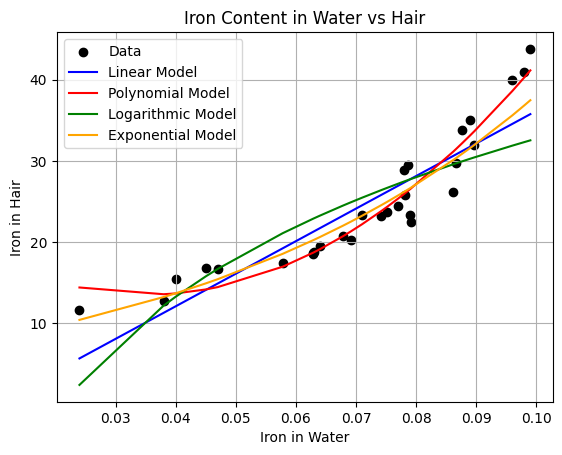

In [9]:
plt.scatter(df['iron_water'], df['iron_hair'], color='black', label='Data')
plt.plot(df['iron_water'], y_pred_linear, color='blue', label='Linear Model')
plt.plot(df['iron_water'], y_pred_poly, color='red', label='Polynomial Model')
plt.plot(df['iron_water'], y_pred_log, color='green', label='Logarithmic Model')
plt.plot(df['iron_water'], y_pred_exp, color='orange', label='Exponential Model')
plt.xlabel('Iron in Water')
plt.ylabel('Iron in Hair')
plt.title('Iron Content in Water vs Hair')
plt.legend()
plt.grid()
plt.show()
